In [1]:
from scipy.stats import beta as beta_dist
import matplotlib.pyplot as plt
import numpy as np

## Source: https://towardsdatascience.com/bayesian-conjugate-priors-simply-explained-747218be0f70

### Problem Background
In Major League Baseball (MLB), the rate the batters hit the ball divided by the number of balls they are pitched is known as batting average. The batting average in 2021 in the MLB was 0.244 (24.4%).

A player starts the season very well and hits his first 3 balls. What would his batting average be? A frequentist would say it is 100%, however us Bayesians would come to a different conclusion.

### Prior
We know that the batting average is 0.244, but what about the possible range of values? A good average is considered to be around 0.3, which is the upper range and one below 0.2 is considered to be quite bad.

Using these values we can construct a suitable Beta prior distribution:

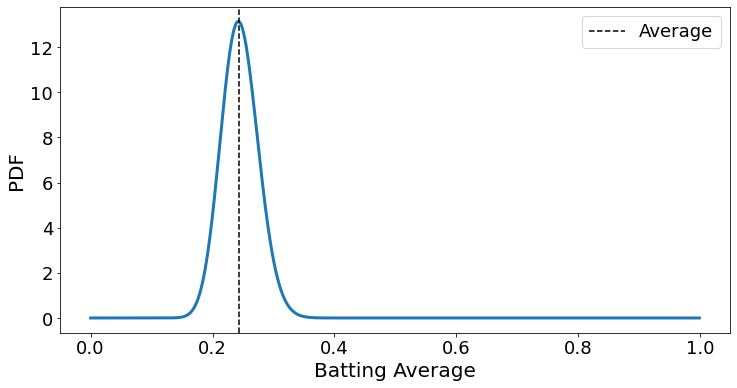

In [2]:
alpha = 49
beta = 151
probability = np.arange (0, 1, 0.001)
prior = beta_dist.pdf(probability, alpha, beta)
plt.figure(figsize=(12,6))
plt.plot(probability, prior, linewidth=3)
plt.xlabel('Batting Average', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(0.244,  linestyle = 'dashed', color='black', label='Average')
plt.legend(fontsize=18)
plt.show()

This looks reasonable as our range is pretty confined between 0.2 and 0.3. There was no particular reason why I chose the values of α=49 and β=151, they just satisify what we know about the prior distribution.

However, this is often the argument made against Bayesian statistics. As the prior is subjective, then so is the posterior. This means probability is no longer objective, but rather a personal belief.

### Likelihood and Posterior
The likelihood of the data is that the new player has hit 3 from 3, therefore they have have an extra 3 successes and 0 failures.

Using our knowledge of the conjugate prior, we can simply add an extra 3 to the value of α and 0 to β:

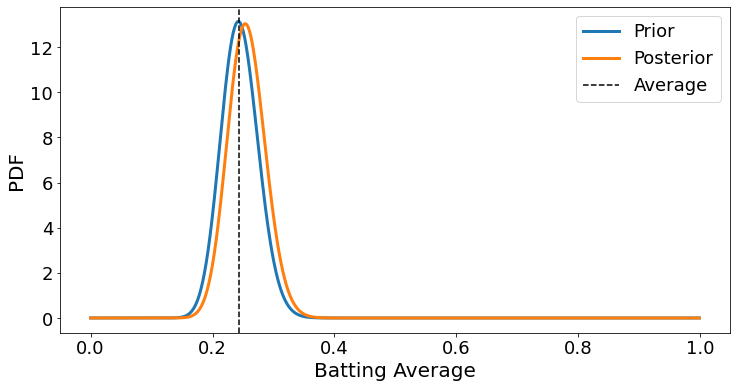

In [3]:
alpha = 49
beta = 151
new_alpha = 49+3
new_beta = 151
probability = np.arange (0, 1, 0.001)
prior = beta_dist.pdf(probability, alpha, beta)
posterior = beta_dist.pdf(probability, new_alpha, new_beta)
plt.figure(figsize=(12,6))
plt.plot(probability, prior, linewidth=3, label='Prior')
plt.plot(probability, posterior, linewidth=3, label='Posterior')
plt.xlabel('Batting Average', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(0.244,  linestyle = 'dashed', color='black', label='Average')
plt.legend(fontsize=18)
plt.show()

It makes sense why the average has barely shifted as three balls is not that many. What if we now said the player hit 40 out of 50 balls, what would the posterior now look like?

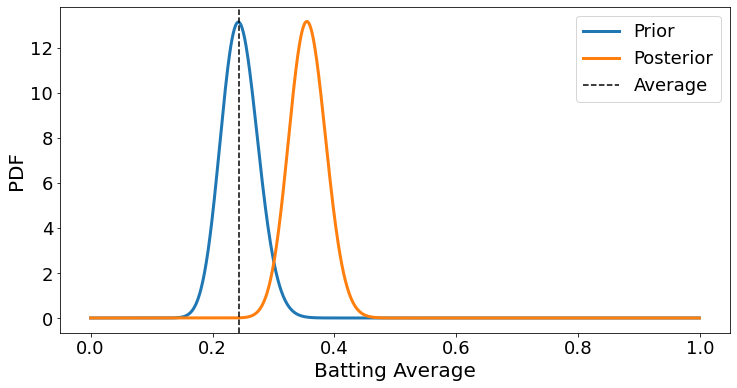

In [4]:
alpha = 49
beta = 151
new_alpha = 49+40
new_beta = 151+10
probability = np.arange (0, 1, 0.001)
prior = beta_dist.pdf(probability, alpha, beta)
posterior = beta_dist.pdf(probability, new_alpha, new_beta)
plt.figure(figsize=(12,6))
plt.plot(probability, prior, linewidth=3, label='Prior')
plt.plot(probability, posterior, linewidth=3, label='Posterior')
plt.xlabel('Batting Average', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(0.244,  linestyle = 'dashed', color='black', label='Average')
plt.legend(fontsize=18)
plt.show()

Conjugate prior made calcuation of posterior very easy.